# In class exercise...
* MI is biased in that small sample sizes lead to inaccurate estimates of PDFs, and that can sometimes lead to negative MI values (which should never happen in theory). 
* A common, and simple, approach, is to compute MI with shuffled condition labels (like randomization tests that we did many weeks back) and then subtract the shuffled MI from the actual MI. 

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr 
from sklearn.neighbors import KernelDensity
# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}
import sys
epsilon = sys.float_info.epsilon #smallest possible value that computer can represent

## First set up two arrays of data...make them correlated to some degree so that there is a reasonably high MI...

In [2]:
N=2 # number of outcomes
size=1000 # size of array

array = np.random.randint(N, size=size)
array1 = array.copy() #array1 is an array of random 0s and 1s 
random_indx = np.random.randint(1,len(array1),size = 600) #create random index to change array2 values; increase size if you want two arrays to be less similar
array[random_indx] = 0 #change random subset of array1's values to 0
array2 = array.copy() 

print('pearson correlation between array 1 and array 2: ', np.corrcoef(array1, array2)[0,1])

pearson correlation between array 1 and array 2:  0.5961196035938413


## Then compute the MI between the arrays. Can do two discrete arrays for simplicity, and import the entropy and conditional entropy functions from the tutorial.

### Import entropy and conditional entropy functions

In [3]:
def entropy(x):
    
    """compute entropy of discrete array x

    Args:
        x (int): array of discrete values

    Returns:
        Hx (float): entropy of x

    """
    
    # figure out unique values of x - can be more than just 0s, 1s
    uniquex = np.unique(x)

    Hx = 0
    for i in np.arange(len(uniquex)):
        # probability that x==uniquex[i]
        px = np.sum(x==uniquex[i])/len(x)    

        # check for px==0 because log2(0) = -inf
        if px!=0:
            Hx += (-np.sum( px * np.log2(px+epsilon) )) 
        else:
            print('px is zero for value ', i)
        
    return Hx

def condEntropy(x,y):
    
    """
    conditional entropy, or the average entropy of x given each y, or Hxy
    1) For all Y {i=1:numel(X)}, compute the entropy of X given each Y
    2) Multiply H(X|Y==i) with the probability of each Y (i.e. pxi)
    3) Sum over all i

    Args:
        x (int): array of discrete values
        y (int): array of discrete values
        
    Returns:
        Hxy (float): average conditional entropy of x given y

    """
    
    Hxy=0
    uniquex = np.unique(x)
    uniquey = np.unique(y)

    # loop over unique elements of y
    for i in np.arange(len(uniquey)): 

        # probability that y==y(i) (prob of each y)
        py = np.sum(y==uniquey[i]) / N

        # then loop over all possible x's to compute entropy of x at each y
        tmp=0
        for j in np.arange(len(uniquex)):
            px_y = np.sum((x==uniquex[j]) & (y==uniquey[i])) / np.sum(y==uniquey[i])    # e.g. prob x==1 when y==0
            tmp += (-( px_y * np.log2(px_y +epsilon) ))                                     # entropy      

        # then tally up entropy of x given each specific y multiplied by the probability of that y (py)
        Hxy += py*tmp

    return Hxy

In [4]:
Hx = entropy(x = array1)
Hxy = condEntropy(x = array1, y = array2)
print('MI is: ', Hx-Hxy) 
real_MI = Hx-Hxy

MI is:  -332.48684065468836


## Now repeat the above operations, but shuffle the data arrays and repeat the analysis many times (~500-1000 times). Plot the distribution of MI values that you get.

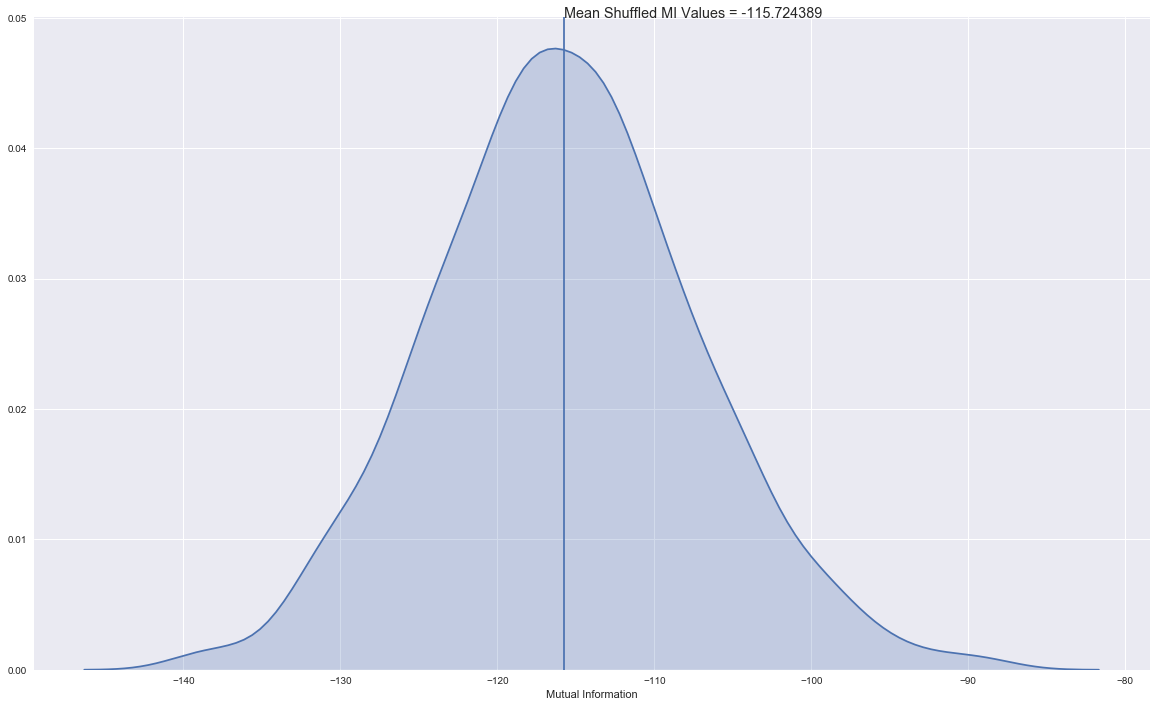

In [7]:
shuffle_times = 1000
N=2 # number of outcomes
size=1000 # size of array

MI_shuffled = np.zeros(1000)

for i in list(range(shuffle_times)):
    array = np.random.randint(N, size=size)
    array1 = array.copy() #array1 is an array of random 0s and 1s 
    random_indx = np.random.randint(1,len(array1),size = 100) #create random index to change array2 values; increase size if you want two arrays to be less similar
    array[random_indx] = 0 #change random subset of array1's values to 0
    array2 = array.copy()
    Hx = entropy(x = array1)
    Hxy = condEntropy(x = array1, y = array2)
    MI_shuffled[i] = Hx - Hxy

MI_shuffled_mean = np.average(MI_shuffled)   

sns.set(rc={'figure.figsize':(20,12)})    
MI_shuffled_plot = plt.axvline(x = MI_shuffled_mean)
MI_shuffled_plot = sns.kdeplot(MI_shuffled, shade=True)
MI_shuffled_plot.text(x=MI_shuffled_mean, y= 0.05, s = 'Mean Shuffled MI Values = %f' %MI_shuffled_mean, size = 'large')
MI_shuffled_plot.set(xlabel='Mutual Information')
plt.show()

## Now subtract the mean of the shuffled MI values from your 'real' MI value...this will help correct for any bias that is introduced by a limited sample size

In [8]:
bias_correction = real_MI - MI_shuffled_mean
print('Bias correction =', bias_correction)

Bias correction = -216.76245208596714
